<a href="https://colab.research.google.com/github/sharmavikash98/aris/blob/main/carprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [71]:
df = pd.read_csv('/content/car data.csv')

In [72]:
print(df)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

In [73]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [74]:
# Check Duplication
df.duplicated().sum()

2

In [75]:
#Check datatype
df.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Driven_kms,int64
Fuel_Type,object
Selling_type,object
Transmission,object
Owner,int64


In [76]:
# Check the number of unique values of each column
df.nunique()

,0
Car_Name,98
Year,16
Selling_Price,156
Present_Price,148
Driven_kms,206
Fuel_Type,3
Selling_type,2
Transmission,2
Owner,3


In [77]:
#Check statistics of data set
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [78]:
null_values = df.isna().sum()
print(null_values)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


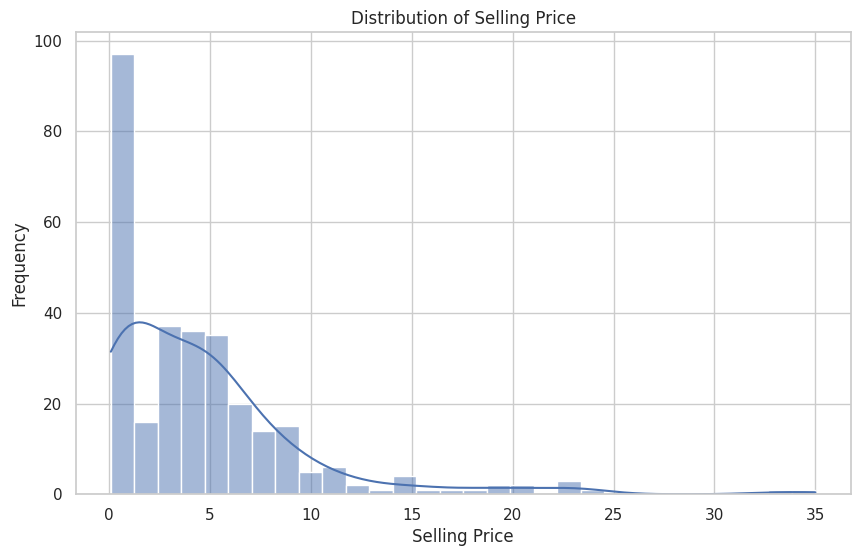

In [79]:
# Setting a style for all plots
sns.set(style="whitegrid")

# 1. Distribution of Selling Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

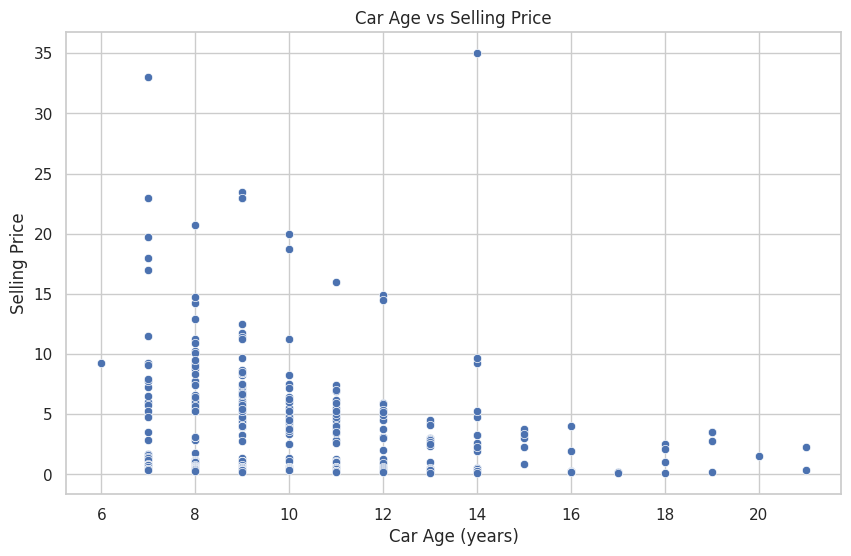

In [80]:
# 2. Car Age vs Selling Price
# Calculate car age from the 'Year' column
df['Car_Age'] = 2024 - df['Year']  # Assuming the current year is 2024

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Car_Age', y='Selling_Price', data=df)
plt.title('Car Age vs Selling Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Selling Price')
plt.show()

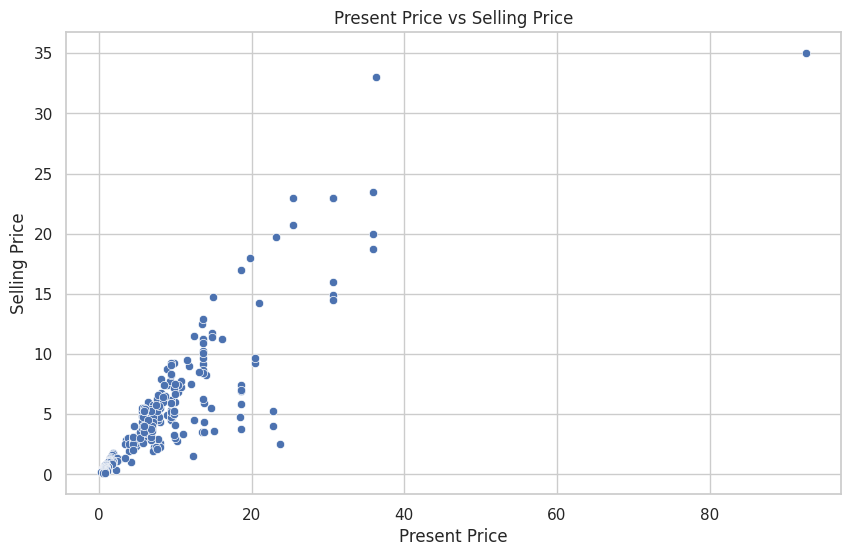

In [81]:
# 3. Present Price vs Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()


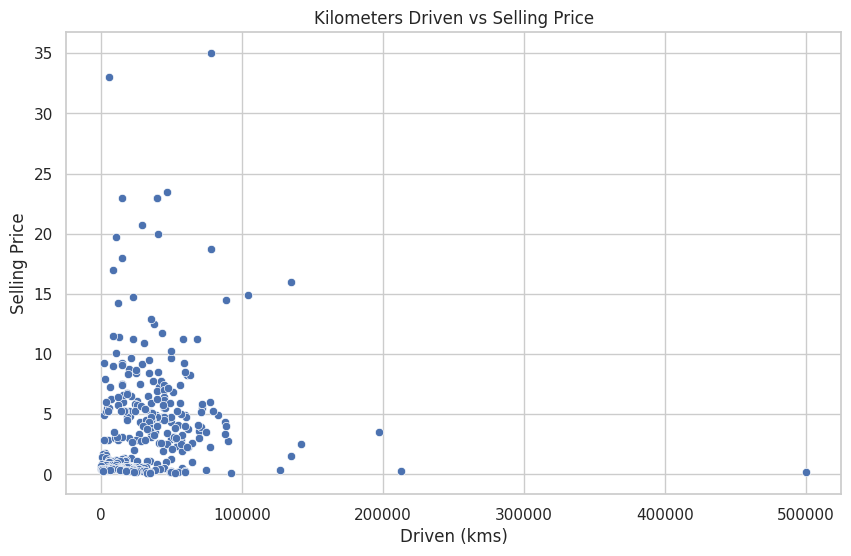

In [82]:
# 4. Driven_kms vs Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Kilometers Driven vs Selling Price')
plt.xlabel('Driven (kms)')
plt.ylabel('Selling Price')
plt.show()


In [83]:
# Separate the features and target variable
X = df.drop(columns=['Selling_Price'])  # Features
y = df['Selling_Price']                 # Target variable


In [84]:
# Identify categorical and numerical columns
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define models to test
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', LinearRegression())]),

    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])
}







In [87]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)

In [88]:
y_pred = model.predict(X_test)

In [89]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

 # Store results
results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}
print(f"Results for {model_name}:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}\n")

Results for Random Forest:
Mean Absolute Error (MAE): 0.5952491803278687
Mean Squared Error (MSE): 0.7886295629508194
Root Mean Squared Error (RMSE): 0.8880481760303433
R^2 Score: 0.9657647253423859



In [90]:
import joblib

# Save the model
joblib.dump(model, 'car_price_model.pkl')

['car_price_model.pkl']